In [216]:
import pandas as pd
import numpy as np

## Question 1

In [217]:
df=pd.read_csv('Weather Data.csv')
df.dropna()
df.head()

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
0,1/1/2012 0:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,1/1/2012 1:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2,1/1/2012 2:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
3,1/1/2012 3:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
4,1/1/2012 4:00,-1.5,-3.3,88,7,4.8,101.23,Fog


In [218]:
date = df['Date/Time'].values
hour = [str(h).split(' ')[1].split(':')[0] for h in date]
months=[str(m).split(' ')[0].split('/')[0] for m in date]
seasons=[]
for m in months:
  m=int(m)
  if((m>=1 and m<=2) or m==12):
    seasons.append(1)
  elif(m>=9 and m<=11):
    seasons.append(0)
  elif(m>=6 and m<=8):
    seasons.append(3)
  else:
    seasons.append(2)

In [219]:
df['Hour']=hour
df['Months']=months
df['Seasons']=seasons
df.drop('Date/Time',axis=1,inplace=True)

In [220]:
weather=df['Weather']

In [221]:
def remove_words(w):
    for word in ['Mostly', 'Mainly', 'Showers', 'Moderate', 'Pellets', 'Freezing']:
        w = w.replace(word, '')
    return w.strip()

weather=[w.split(',')[0] for w in weather]
weather=pd.Series(weather)

weather = weather.apply(remove_words)

df["Weather"]=weather

In [222]:
df

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather,Hour,Months,Seasons
0,-1.8,-3.9,86,4,8.0,101.24,Fog,0,1,1
1,-1.8,-3.7,87,4,8.0,101.24,Fog,1,1,1
2,-1.8,-3.4,89,7,4.0,101.26,Drizzle,2,1,1
3,-1.5,-3.2,88,6,4.0,101.27,Drizzle,3,1,1
4,-1.5,-3.3,88,7,4.8,101.23,Fog,4,1,1
...,...,...,...,...,...,...,...,...,...,...
8779,0.1,-2.7,81,30,9.7,100.13,Snow,19,12,1
8780,0.2,-2.4,83,24,9.7,100.03,Snow,20,12,1
8781,-0.5,-1.5,93,28,4.8,99.95,Snow,21,12,1
8782,-0.2,-1.8,89,28,9.7,99.91,Snow,22,12,1


## Question 2

In [223]:
df.describe

<bound method NDFrame.describe of       Temp_C  Dew Point Temp_C  Rel Hum_%  Wind Speed_km/h  Visibility_km   
0       -1.8              -3.9         86                4            8.0  \
1       -1.8              -3.7         87                4            8.0   
2       -1.8              -3.4         89                7            4.0   
3       -1.5              -3.2         88                6            4.0   
4       -1.5              -3.3         88                7            4.8   
...      ...               ...        ...              ...            ...   
8779     0.1              -2.7         81               30            9.7   
8780     0.2              -2.4         83               24            9.7   
8781    -0.5              -1.5         93               28            4.8   
8782    -0.2              -1.8         89               28            9.7   
8783     0.0              -2.1         86               30           11.3   

      Press_kPa  Weather Hour Months  Sea

In [224]:
import matplotlib.pyplot as plt
%matplotlib inline

(array([  50.,  245.,  691., 1037., 1469., 1109., 1338., 1450., 1142.,
         253.]),
 array([-23.3 , -17.67, -12.04,  -6.41,  -0.78,   4.85,  10.48,  16.11,
         21.74,  27.37,  33.  ]),
 <BarContainer object of 10 artists>)

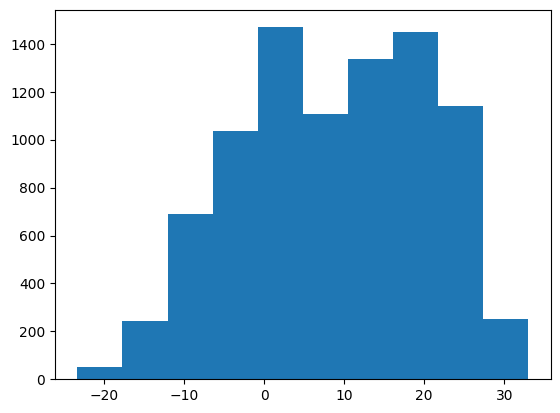

In [225]:
plt.hist(df['Temp_C'])

Ειναι κανονική κατανομή γιατι οι τιμές σχηματίζουν μια καμπύλη με συμμετρία γύρω από το μέσο όρο.

<BarContainer object of 8 artists>

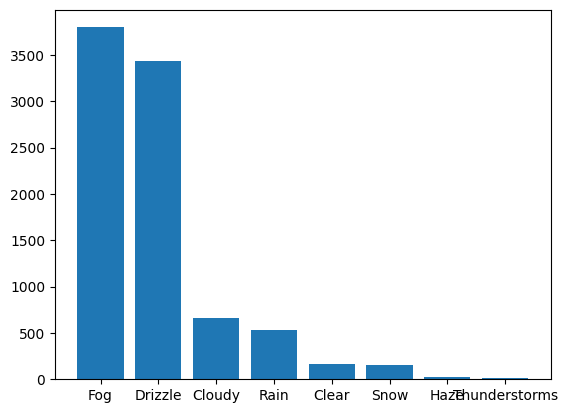

In [226]:
plt.bar(df['Weather'].unique(),df['Weather'].value_counts())

Η κλάση weather δεν είναι balance. Βλέπουμε ότι υπάρχουν μεγάλες διαφορές μεταξύ των κλάσεων.

## Question 3

In [227]:
def encoding_and_bind(df):
    dummies = pd.get_dummies(df['Weather'])
    res = pd.concat([df,dummies],axis=1)
    df = res.drop ( columns=['Weather'] )
    return df.dropna()

In [228]:
df=encoding_and_bind(df)

In [229]:
df.head()

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Hour,Months,Seasons,Clear,Cloudy,Drizzle,Fog,Haze,Rain,Snow,Thunderstorms
0,-1.8,-3.9,86,4,8.0,101.24,0,1,1,False,False,False,True,False,False,False,False
1,-1.8,-3.7,87,4,8.0,101.24,1,1,1,False,False,False,True,False,False,False,False
2,-1.8,-3.4,89,7,4.0,101.26,2,1,1,False,False,True,False,False,False,False,False
3,-1.5,-3.2,88,6,4.0,101.27,3,1,1,False,False,True,False,False,False,False,False
4,-1.5,-3.3,88,7,4.8,101.23,4,1,1,False,False,False,True,False,False,False,False


In [230]:
target_col=df['Temp_C']
feature_col=df.drop(columns=['Temp_C'])

In [231]:
from sklearn.preprocessing import MaxAbsScaler

feature_col = MaxAbsScaler().fit_transform(feature_col)

In [232]:
from sklearn.model_selection import train_test_split
# First split the data into a temporary training + validation set (90%) and the test set (10%)
X_temp, X_test, y_temp, y_test = train_test_split(feature_col, target_col, test_size=0.1, random_state=0)

# Then split the temporary training + validation set into the final training set (77.78% of 90% = 70%) and the validation set (22.22% of 90% = 19,998%)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.222, random_state=0)

In [233]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error as MAE

n_neighbors=[5, 15, 25, 35, 45, 55, 65, 95]
models=[]
for n in n_neighbors:
    KNNRegressor = KNeighborsRegressor(n_neighbors=n,weights='distance')
    KNNRegressor.fit(X_train, y_train)
    models.append([KNNRegressor,MAE(y_val, KNNRegressor.predict(X_val))])

In [234]:
models.sort(key=lambda x: x[1])
models[0]

[KNeighborsRegressor(weights='distance'), 0.9466768787315152]

In [235]:
x_new_train = pd.concat([pd.DataFrame(X_train), pd.DataFrame(X_val)])
y_new_train = pd.concat([pd.Series(y_train), pd.Series(y_val)])

In [236]:

models[0][0].fit(x_new_train,y_new_train)

KNeighborsRegressor(weights='distance')

In [237]:
from sklearn.metrics import r2_score

print("R2: {:.4f}".format(r2_score(y_test, models[0][0].predict(X_test))))
print("STD: {:.4f}".format(np.std(y_test-models[0][0].predict(X_test))))
print('MAE: {:.4f}'.format(MAE(y_test, models[0][0].predict(X_test))))
models[0][1]=MAE(y_test, models[0][0].predict(X_test))

R2: 0.9904
STD: 1.1371
MAE: 0.7903


In [238]:
from tabulate import tabulate
print(tabulate(models, headers=['Model', 'Validation MAE'], tablefmt='fancy_grid'))

╒═════════════════════════════════════════════════════════╤══════════════════╕
│ Model                                                   │   Validation MAE │
╞═════════════════════════════════════════════════════════╪══════════════════╡
│ KNeighborsRegressor(weights='distance')                 │         0.790273 │
├─────────────────────────────────────────────────────────┼──────────────────┤
│ KNeighborsRegressor(n_neighbors=15, weights='distance') │         1.18459  │
├─────────────────────────────────────────────────────────┼──────────────────┤
│ KNeighborsRegressor(n_neighbors=25, weights='distance') │         1.36026  │
├─────────────────────────────────────────────────────────┼──────────────────┤
│ KNeighborsRegressor(n_neighbors=35, weights='distance') │         1.50789  │
├─────────────────────────────────────────────────────────┼──────────────────┤
│ KNeighborsRegressor(n_neighbors=45, weights='distance') │         1.63311  │
├───────────────────────────────────────────────────

### Repeat 2-5

In [239]:
# First split the data into a temporary training + validation set (90%) and the test set (10%)
X_temp, X_test, y_temp, y_test = train_test_split(feature_col, target_col, test_size=0.1, random_state=0)

# Then split the temporary training + validation set into the final training set (77.78% of 90% = 70%) and the validation set (22.222% of 90% = 19,998%)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.222, random_state=0)

In [240]:
feature_col_norm = MaxAbsScaler().fit_transform(feature_col)

In [241]:
from sklearn.model_selection import cross_val_score

n_neighbors=[5, 15, 25, 35, 45, 55, 65, 95]
# k_folds = [5, 10, 15, 20]
models=[]
for n in n_neighbors:
    # for cv in k_folds:
    KNNRegressor = KNeighborsRegressor(n_neighbors=n, weights='distance')
    KNNRegressor.fit(X_train, y_train)
    cv_scores = cross_val_score(KNNRegressor, feature_col_norm, target_col, scoring='neg_mean_absolute_error')
    mean_cv_score = -np.mean(cv_scores)  # Η cross_val_score επιστρέφει αρνητικές τιμές για τα σφάλματα
    models.append([KNNRegressor, mean_cv_score, n])

sorted_models = sorted(models, key=lambda x: x[1])
print(tabulate(sorted_models, headers=['Model', 'Cross Validation','n_neighbors'], tablefmt='fancy_grid'))

╒═════════════════════════════════════════════════════════╤════════════════════╤═══════════════╕
│ Model                                                   │   Cross Validation │   n_neighbors │
╞═════════════════════════════════════════════════════════╪════════════════════╪═══════════════╡
│ KNeighborsRegressor(weights='distance')                 │            3.78263 │             5 │
├─────────────────────────────────────────────────────────┼────────────────────┼───────────────┤
│ KNeighborsRegressor(n_neighbors=15, weights='distance') │            4.1704  │            15 │
├─────────────────────────────────────────────────────────┼────────────────────┼───────────────┤
│ KNeighborsRegressor(n_neighbors=25, weights='distance') │            4.40551 │            25 │
├─────────────────────────────────────────────────────────┼────────────────────┼───────────────┤
│ KNeighborsRegressor(n_neighbors=35, weights='distance') │            4.56539 │            35 │
├─────────────────────────────

Αν επιλέξετε το καλύτερο k με βάση το cross validation, βελτιώνεται η απόδοση του KNN στο test set? Αν ναι, αιτιολογήστε το λόγο. 

* Το καλύτερο Κ παραμένει το 5.

Πως μπορούμε να αξιοποιήσουμε την τυπική απόκλιση (STD) του σφάλματος σε συνδυασμό με τη μετρική ΜΑΕ  για να αξιολογήσουμε το μοντέλο μας?

* MAE δείχνει το μέσο σφάλμα του μοντέλου. STD του σφάλματος αντικατοπτρίζει την συνέπεια των σφαλμάτων. Χαμηλά MAE και STD είναι ιδανικά για ένα ακριβές και συνεπές μοντέλο.

## Question 4

In [242]:
df

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Hour,Months,Seasons,Clear,Cloudy,Drizzle,Fog,Haze,Rain,Snow,Thunderstorms
0,-1.8,-3.9,86,4,8.0,101.24,0,1,1,False,False,False,True,False,False,False,False
1,-1.8,-3.7,87,4,8.0,101.24,1,1,1,False,False,False,True,False,False,False,False
2,-1.8,-3.4,89,7,4.0,101.26,2,1,1,False,False,True,False,False,False,False,False
3,-1.5,-3.2,88,6,4.0,101.27,3,1,1,False,False,True,False,False,False,False,False
4,-1.5,-3.3,88,7,4.8,101.23,4,1,1,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8779,0.1,-2.7,81,30,9.7,100.13,19,12,1,False,False,False,False,False,False,True,False
8780,0.2,-2.4,83,24,9.7,100.03,20,12,1,False,False,False,False,False,False,True,False
8781,-0.5,-1.5,93,28,4.8,99.95,21,12,1,False,False,False,False,False,False,True,False
8782,-0.2,-1.8,89,28,9.7,99.91,22,12,1,False,False,False,False,False,False,True,False


In [243]:
data = df[(df['Snow']) | (df['Clear'])]
data

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Hour,Months,Seasons,Clear,Cloudy,Drizzle,Fog,Haze,Rain,Snow,Thunderstorms
36,1.7,-6.2,56,48,24.1,99.21,12,1,1,True,False,False,False,False,False,False,False
41,-2.1,-9.5,57,22,25.0,99.66,17,1,1,False,False,False,False,False,False,True,False
44,-5.6,-13.4,54,24,25.0,100.07,20,1,1,False,False,False,False,False,False,True,False
45,-5.8,-12.8,58,26,25.0,100.15,21,1,1,False,False,False,False,False,False,True,False
47,-7.4,-14.1,59,17,19.3,100.27,23,1,1,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8779,0.1,-2.7,81,30,9.7,100.13,19,12,1,False,False,False,False,False,False,True,False
8780,0.2,-2.4,83,24,9.7,100.03,20,12,1,False,False,False,False,False,False,True,False
8781,-0.5,-1.5,93,28,4.8,99.95,21,12,1,False,False,False,False,False,False,True,False
8782,-0.2,-1.8,89,28,9.7,99.91,22,12,1,False,False,False,False,False,False,True,False


<BarContainer object of 2 artists>

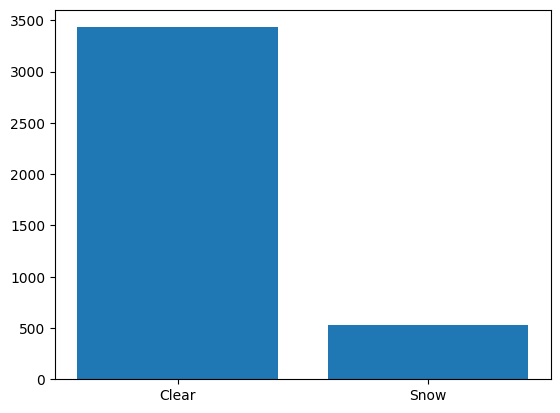

In [244]:
plt.bar(['Clear','Snow'],[data['Clear'].value_counts()[True],data['Snow'].value_counts()[True]])

In [ ]:
data.drop(columns=['Cloudy','Drizzle','Fog','Haze','Rain','Thunderstorms'],inplace=True)
data

In [ ]:
data['Weather'] = data['Clear'].apply(lambda x: 1 if x == True else 0)
data['Weather'] = data['Clear'].apply(lambda x: 0 if x == 1 else 1)

data.drop(columns=['Clear','Snow'],inplace=True)

In [247]:
feature_col=data.drop(columns=['Weather'])
target_col=data['Weather']

In [248]:
X_train, X_test, y_train, y_test = train_test_split(feature_col,target_col, test_size=0.3, random_state=0)

In [249]:
mas=MaxAbsScaler()
X_train_norm=mas.fit_transform(X_train)
X_test_norm=mas.transform(X_test)

In [250]:
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.neighbors import KNeighborsClassifier

models=[]
for n in n_neighbors:
    KNNClassifier = KNeighborsClassifier(n_neighbors=n, weights='distance')
    KNNClassifier.fit(X_train_norm, y_train)
    y_pred=KNNClassifier.predict(X_test_norm)
    
    f1 = f1_score(y_test, y_pred)
    accuracy=accuracy_score(y_test,y_pred)
    recall=recall_score(y_test,y_pred)
    precision=precision_score(y_test,y_pred)
    
    models.append([KNNClassifier, f1,accuracy,recall,precision])

models.sort(key=lambda x: x[1],reverse=True)
print(tabulate(models, headers=['Model', 'F1 Score','Accuracy','Recall',"Precision"], tablefmt='fancy_grid'))    

╒══════════════════════════════════════════════════════════╤════════════╤════════════╤══════════╤═════════════╕
│ Model                                                    │   F1 Score │   Accuracy │   Recall │   Precision │
╞══════════════════════════════════════════════════════════╪════════════╪════════════╪══════════╪═════════════╡
│ KNeighborsClassifier(weights='distance')                 │   0.896552 │   0.972222 │ 0.82659  │    0.979452 │
├──────────────────────────────────────────────────────────┼────────────┼────────────┼──────────┼─────────────┤
│ KNeighborsClassifier(n_neighbors=15, weights='distance') │   0.86645  │   0.965488 │ 0.768786 │    0.992537 │
├──────────────────────────────────────────────────────────┼────────────┼────────────┼──────────┼─────────────┤
│ KNeighborsClassifier(n_neighbors=25, weights='distance') │   0.84106  │   0.959596 │ 0.734104 │    0.984496 │
├──────────────────────────────────────────────────────────┼────────────┼────────────┼──────────┼───────

 Λόγω της ανισορροπίας των δεδομενων, ο F1 Score είναι πιο αξιόπιστος από τον απλό δείκτη accuracy.

Για τα αεροπλανα η μετρικη recall ειναι η πιο χρησιμη γιατι μας ενδιαφερει να γνωριζουμε ποτε ο καθαρος καιρος ανιχνευεται σωστα

Ενα υψηλό recall δηλώνει ότι το μοντέλο είναι ικανό να ανιχνεύσει με ακρίβεια τις περιπτώσεις καθαρού καιρού

In [251]:
X_train, X_test, y_train, y_test = train_test_split(feature_col,target_col, test_size=0.3, random_state=0,stratify=target_col)

mas=MaxAbsScaler()
X_train_norm=mas.fit_transform(X_train)
X_test_norm=mas.transform(X_test)

models=[]
for n in n_neighbors:
    KNNClassifier = KNeighborsClassifier(n_neighbors=n, weights='distance')
    KNNClassifier.fit(X_train_norm, y_train)
    y_pred=KNNClassifier.predict(X_test_norm)
    
    f1 = f1_score(y_test, y_pred)
    accuracy=accuracy_score(y_test,y_pred)
    recall=recall_score(y_test,y_pred)
    precision=precision_score(y_test,y_pred)
    
    models.append([KNNClassifier, f1,accuracy,recall,precision])

models.sort(key=lambda x: x[1],reverse=True)
print(tabulate(models, headers=['Model', 'F1 Score','Accuracy','Recall',"Precision"], tablefmt='fancy_grid'))    

╒══════════════════════════════════════════════════════════╤════════════╤════════════╤══════════╤═════════════╕
│ Model                                                    │   F1 Score │   Accuracy │   Recall │   Precision │
╞══════════════════════════════════════════════════════════╪════════════╪════════════╪══════════╪═════════════╡
│ KNeighborsClassifier(weights='distance')                 │   0.877551 │   0.969697 │ 0.816456 │    0.948529 │
├──────────────────────────────────────────────────────────┼────────────┼────────────┼──────────┼─────────────┤
│ KNeighborsClassifier(n_neighbors=15, weights='distance') │   0.871429 │   0.969697 │ 0.772152 │    1        │
├──────────────────────────────────────────────────────────┼────────────┼────────────┼──────────┼─────────────┤
│ KNeighborsClassifier(n_neighbors=25, weights='distance') │   0.860215 │   0.967172 │ 0.759494 │    0.991736 │
├──────────────────────────────────────────────────────────┼────────────┼────────────┼──────────┼───────

Το stratify βοηθαει στο να χωρισει τα δεδομενα αναλογα με την αναλογια των δεδομενων. Για παραδειγμα τα δεδομενα Clear και Snow έχουν αναλογία εμφάνισης 6.5:1 και χωρίς τη χρήση του stratify, το train ή test set θα μπορούσε να έχει ανισορροπημένη κατανομή των κλάσεων, γεγονός που θα μπορούσε να οδηγήσει σε προκατειλημμένη εκπαίδευση ή αξιολόγηση του μοντέλου. 